### Preprocess the original dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

def clean_numeric(x):
    """Clean numeric values by removing commas and converting to float."""
    if pd.isna(x):
        return np.nan
    if isinstance(x, (int, float)):
        return float(x)
    if isinstance(x, str):
        # Remove commas and spaces
        x = x.strip().replace(',', '')
        # Handle empty strings and dashes
        if x in ['', '-', ' -   ', '  -  ']:
            return np.nan
        try:
            return float(x)
        except ValueError:
            return np.nan
    return np.nan

def load_data(file_path):
    """Load the dataset and perform initial analysis."""
    df = pd.read_csv(file_path)

    # Clean column names
    df.columns = df.columns.str.strip()

    # Convert numeric columns
    feature_cols = [col for col in df.columns if col.startswith('Feature')]
    target_cols = [col for col in df.columns if col.startswith('Target')]

    for col in feature_cols + target_cols:
        df[col] = df[col].apply(clean_numeric)

    print(f"Initial shape: {df.shape}")
    print("\nMissing values:\n", df.isnull().sum())

    # Print data types
    print("\nData types:")
    print(df.dtypes)

    return df

def handle_missing_values(df, n_neighbors=5):
    """Handle missing values using KNN Imputer."""
    # Separate features from targets and categorical columns
    features = df.filter(regex='Feature\d+')
    targets = df[['Target 1', 'Target 2', 'Target 3']]
    categorical = df[['Year', 'Company']]

    # Apply KNN imputation to features
    imputer = KNNImputer(n_neighbors=n_neighbors)
    features_imputed = pd.DataFrame(
        imputer.fit_transform(features),
        columns=features.columns,
        index=features.index
    )

    # Combine back
    df_imputed = pd.concat([categorical, features_imputed, targets], axis=1)
    return df_imputed

def handle_outliers(df, method = 'iqr'):
    """Handle outliers using IQR method with winsorization."""
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        if col not in ['Year']:  # Skip year column
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Winsorization
            df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df

def normalize_features(df):
    """Normalize features using StandardScaler."""
    # Separate features and targets
    features = df.filter(regex='Feature\d+')
    targets = df[['Target 1', 'Target 2', 'Target 3']]
    categorical = df[['Year', 'Company']]

    # Normalize features
    scaler = StandardScaler()
    features_normalized = pd.DataFrame(
        scaler.fit_transform(features),
        columns=features.columns,
        index=features.index
    )

    # Combine back
    df_normalized = pd.concat([categorical, features_normalized, targets], axis=1)
    return df_normalized

def analyze_data(df, stage):
    """Print analysis at different stages."""
    print(f"\n=== Analysis at {stage} ===")
    print(f"Shape: {df.shape}")
    print("\nSummary statistics for numeric columns:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    print(df[numeric_cols].describe())

    if stage == "Final Stage":
        print("\nTarget variables statistics:")
        print(df[['Target 1', 'Target 2', 'Target 3']].describe())

        # Print correlation between features and targets
        features = df.filter(regex='Feature\d+')
        targets = df[['Target 1', 'Target 2', 'Target 3']]

        print("\nTop 5 features correlated with targets:")
        for target in targets.columns:
            correlations = features.corrwith(targets[target]).sort_values(ascending=False)
            print(f"\n{target}:")
            print(correlations.head())

def main():
    # Load data
    df = load_data('/content/FidelFolio_Dataset.csv')
    analyze_data(df, "Initial Stage")

    # Handle missing values
    print("\nHandling missing values...")
    df_clean = handle_missing_values(df)
    analyze_data(df_clean, "After Missing Values Treatment")

    # Handle outliers
    print("\nHandling outliers...")
    df_clean = handle_outliers(df_clean)
    analyze_data(df_clean, "After Outlier Treatment")

    # Normalize features
    print("\nNormalizing features...")
    df_final = normalize_features(df_clean)
    analyze_data(df_final, "Final Stage")

    # Save processed data
    df_final.to_csv('data_KNN.csv', index=False)
    print("\nProcessed data saved to 'processed_data.csv'")

if __name__ == "__main__":
  main()

Initial shape: (24751, 33)

Missing values:
 Year            0
Company         0
Feature1     3837
Feature2     2752
Feature3     1981
Feature4      547
Feature5      603
Feature6      701
Feature7      477
Feature8        0
Feature9     1252
Feature10     726
Feature11     544
Feature12     459
Feature13      22
Feature14      35
Feature15     553
Feature16     126
Feature17      49
Feature18     126
Feature19      27
Feature20     367
Feature21     417
Feature22     187
Feature23      45
Feature24      46
Feature25      50
Feature26      49
Feature27      24
Feature28    2032
Target 1     1787
Target 2     3342
Target 3     4866
dtype: int64

Data types:
Year           int64
Company       object
Feature1     float64
Feature2     float64
Feature3     float64
Feature4     float64
Feature5     float64
Feature6     float64
Feature7     float64
Feature8     float64
Feature9     float64
Feature10    float64
Feature11    float64
Feature12    float64
Feature13    float64
Feature14    float64

In [ ]:
df = pd.read_csv('/content/data_KNN.csv')

In [ ]:
df.count()

,0
Year,24751
Company,24751
Feature1,24751
Feature2,24751
Feature3,24751
Feature4,24751
Feature5,24751
Feature6,24751
Feature7,24751
Feature8,24751


In [ ]:
df['Target 1'].isnull().sum()

np.int64(1787)

In [ ]:
df['Target 2'].isnull().sum()

np.int64(3342)

In [ ]:
df['Target 3'].isnull().sum()

np.int64(4866)

In [ ]:
df1 = df.drop(['Target 2', 'Target 3'], axis=1).dropna()
df2 = df.drop(['Target 1', 'Target 3'], axis=1).dropna()
df3 = df.drop(['Target 1', 'Target 2'], axis=1).dropna()

In [ ]:
df1.shape

(22964, 31)

In [ ]:
df2.shape

(21409, 31)

In [ ]:
df3.shape

(19885, 31)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input, MultiHeadAttention, LayerNormalization, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
import shap  # For SHAP values calculation
from sklearn.inspection import permutation_importance  # For feature importance

## Target 1

Created 16264 sequences with shape (16264, 3, 28)
Year distribution in sequences:
Year
2001    481
2002    481
2003    505
2004    528
2005    553
2006    555
2007    588
2008    639
2009    685
2010    766
2011    772
2012    801
2013    837
2014    833
2015    851
2016    865
2017    887
2018    892
2019    912
2020    916
2021    964
2022    953
Name: count, dtype: int64

Creating strict time-based cross-validation splits (no overlapping years)...
Fold 1: Train years: 2001-2004, Test years: 2005-2008, Train size: 1995, Test size: 2335
Fold 2: Train years: 2001-2008, Test years: 2009-2012, Train size: 4330, Test size: 3024
Fold 3: Train years: 2001-2012, Test years: 2013-2016, Train size: 7354, Test size: 3386
Fold 4: Train years: 2001-2016, Test years: 2017-2020, Train size: 10740, Test size: 3607
Fold 5: Train years: 2001-2020, Test years: 2021-2022, Train size: 14347, Test size: 1917

Training models for Target 1

Training mlp for Target 1 - Fold 1/5
Epoch 1/10
50/50 ━━━━━━━━━━━━━

MLP - Target 1 - Average CV RMSE: 56.1677

Training lstm for Target 1 - Fold 1/5
Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 4952.2358 - mae: 55.2085 - val_loss: 4557.4141 - val_mae: 52.7991 - learning_rate: 0.0010
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 4840.6636 - mae: 54.6821 - val_loss: 4472.7773 - val_mae: 52.4482 - learning_rate: 0.0010
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4745.8936 - mae: 54.2196 - val_loss: 4430.8271 - val_mae: 52.2761 - learning_rate: 0.0010
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4697.7524 - mae: 53.9551 - val_loss: 4391.0493 - val_mae: 52.1180 - learning_rate: 0.0010
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4670.0073 - mae: 53.8674 - val_loss: 4354.8940 - val_mae: 51.9759 - learning_rate: 0.0010
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4638.5342 - mae: 53.6769 - val_loss: 4326.6821 - val_mae: 51.8774 - learning_rate: 0.0010
Epoch 7/10
50/50 ━━━━━━━━━━━━

LSTM - Target 1 - Average CV RMSE: 53.8535

Training transformer for Target 1 - Fold 1/5
Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - loss: 4867.9956 - mae: 54.8896 - val_loss: 4346.7314 - val_mae: 51.9864 - learning_rate: 0.0010
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4557.9746 - mae: 53.3589 - val_loss: 4215.1367 - val_mae: 51.5234 - learning_rate: 0.0010
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4417.4790 - mae: 52.7580 - val_loss: 4104.1240 - val_mae: 51.0796 - learning_rate: 0.0010
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4302.8809 - mae: 52.3333 - val_loss: 4021.6440 - val_mae: 50.8119 - learning_rate: 0.0010
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4246.1548 - mae: 52.2215 - val_loss: 3972.9314 - val_mae: 50.8416 - learning_rate: 0.0010
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4190.0586 - mae: 52.1476 - val_loss: 3940.5884 - val_mae: 50.8955 - learning_rate: 0.0010
Epoch 7/10
50/50 ━━━━━

TRANSFORMER - Target 1 - Average CV RMSE: 55.1104

Comparing feature importance across targets...

Model interpretability analysis completed. Results saved to the 'interpretability' directory.


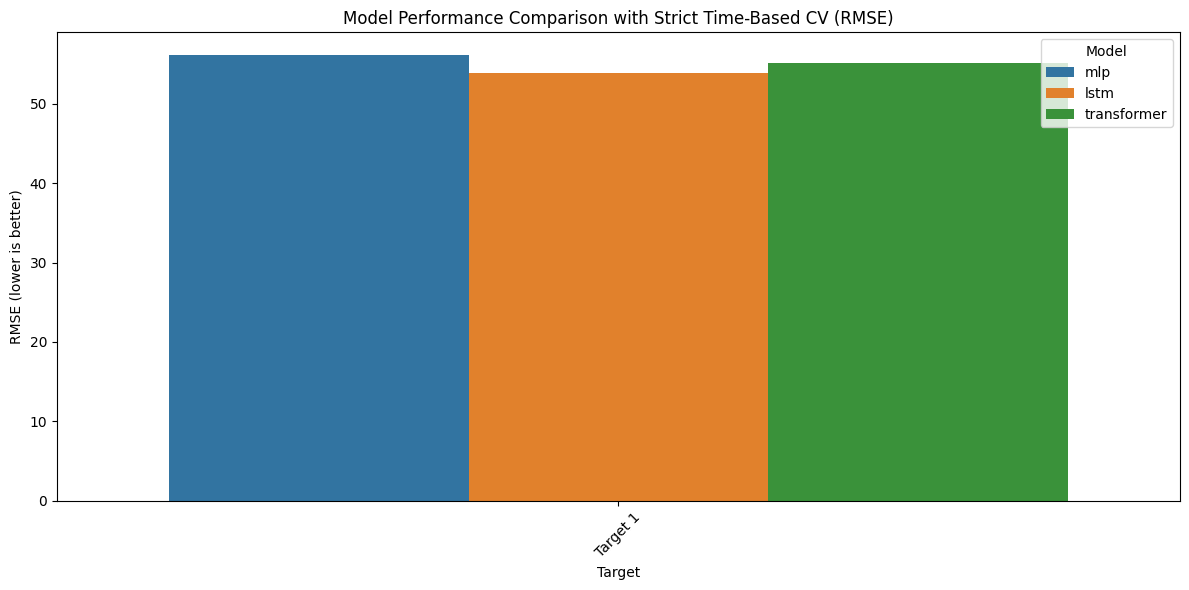

In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Create directories for saving models and results
os.makedirs('models', exist_ok=True)
os.makedirs('results', exist_ok=True)
os.makedirs('plots', exist_ok=True)
os.makedirs('interpretability', exist_ok=True)  # For interpretability results

# ================= MODEL INTERPRETABILITY FUNCTIONS =================
# Analyze feature importance using a permutation approach
def analyze_feature_importance_inline(model_type, target_name, X_test, y_test, feature_names, model=None):
    """
    Analyze and visualize feature importance directly without loading saved models
    """
    print(f"\nAnalyzing feature importance for {model_type} on {target_name}...")

    if model is None:
        print(f"No model provided for {model_type} on {target_name}, skipping analysis")
        return None

    # Create baseline prediction
    baseline_pred = model.predict(X_test, verbose=0).flatten()
    baseline_mse = mean_squared_error(y_test, baseline_pred)

    # Calculate feature importance via permutation
    feature_importances = []

    # For sequence data, analyze each feature
    seq_length, n_features = X_test.shape[1], X_test.shape[2]

    for feat_idx in range(n_features):
        # Copy the test data
        X_permuted = X_test.copy()

        # Permute this feature across all time steps
        for t in range(seq_length):
            X_permuted[:, t, feat_idx] = np.random.permutation(X_permuted[:, t, feat_idx])

        # Make predictions with permuted feature
        perm_pred = model.predict(X_permuted, verbose=0).flatten()
        perm_mse = mean_squared_error(y_test, perm_pred)

        # Importance is the increase in error when feature is permuted
        importance = perm_mse - baseline_mse
        feature_importances.append(importance)

    # Create DataFrame with feature importances
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    })
    importance_df = importance_df.sort_values('Importance', ascending=False)

    # Save to CSV
    importance_df.to_csv(f"interpretability/{model_type}{target_name.replace(' ', '')}_importance.csv", index=False)

    # Visualize top features
    plt.figure(figsize=(12, 6))
    top_features = importance_df.head(10)
    sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
    plt.title(f"Top 10 Important Features for {target_name} ({model_type.upper()})")
    plt.xlabel('Permutation Importance (higher = more important)')
    plt.tight_layout()
    plt.savefig(f"interpretability/{model_type}{target_name.replace(' ', '')}_importance.png")
    plt.close()

    return importance_df

# Visualize prediction distribution and confidence
def visualize_prediction_confidence_inline(model_type, target_name, X_test, y_test, model=None):
    """
    Visualize model predictions, errors, and confidence directly without loading saved models
    """
    print(f"\nVisualizing prediction confidence for {model_type} on {target_name}...")

    if model is None:
        print(f"No model provided for {model_type} on {target_name}, skipping visualization")
        return

    # Generate predictions
    y_pred = model.predict(X_test, verbose=0).flatten()

    # Calculate absolute error for each prediction
    abs_errors = np.abs(y_test - y_pred)

    # Create dataframe for visualization
    pred_df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred,
        'AbsError': abs_errors
    })

    # Create scatter plot with error as color
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(pred_df['Actual'], pred_df['Predicted'],
                         c=pred_df['AbsError'], cmap='viridis', alpha=0.7)

    # Add perfect prediction line
    min_val = min(pred_df['Actual'].min(), pred_df['Predicted'].min())
    max_val = max(pred_df['Actual'].max(), pred_df['Predicted'].max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

    plt.colorbar(scatter, label='Absolute Error')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Prediction Confidence - {model_type.upper()} for {target_name}')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"interpretability/{model_type}{target_name.replace(' ', '')}_prediction_confidence.png")
    plt.close()

    # Create error distribution plot
    plt.figure(figsize=(10, 6))
    sns.histplot(pred_df['AbsError'], kde=True)
    plt.xlabel('Absolute Error')
    plt.ylabel('Frequency')
    plt.title(f'Error Distribution - {model_type.upper()} for {target_name}')
    plt.tight_layout()
    plt.savefig(f"interpretability/{model_type}{target_name.replace(' ', '')}_error_distribution.png")
    plt.close()

# Create a function to compare importances across targets
def compare_importances(importance_data, model_type):
    """Compare feature importance across different targets"""
    # If we have data for all targets, create comparison
    if len(importance_data) >= 2:  # Need at least 2 targets to compare
        # Get top 5 features from each target
        all_top_features = []
        for target, imp_df in importance_data.items():
            all_top_features.extend(imp_df.head(5)['Feature'].tolist())

        # Create unique list
        all_top_features = list(set(all_top_features))

        # Create comparison dataframe
        comparison_df = pd.DataFrame({'Feature': all_top_features})

        # Add importance for each target
        for target, imp_df in importance_data.items():
            # Get importance values for these features
            target_df = imp_df[imp_df['Feature'].isin(all_top_features)]
            # Create a mapping from feature to importance
            importance_map = dict(zip(target_df['Feature'], target_df['Importance']))

            # Add to comparison df with the target name as column
            comparison_df[target] = comparison_df['Feature'].map(importance_map).fillna(0)

        # Save to CSV
        comparison_df.to_csv(f"interpretability/{model_type}_feature_importance_comparison.csv", index=False)

        # Create heatmap visualization
        plt.figure(figsize=(12, 8))
        heatmap_df = comparison_df.set_index('Feature')
        sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.3f')
        plt.title(f'Feature Importance Comparison Across Targets - {model_type.upper()}')
        plt.tight_layout()
        plt.savefig(f"interpretability/{model_type}_feature_importance_heatmap.png")
        plt.close()

# # Load the preprocessed dataset
# data = pd.read_csv('processed_data.csv')
# print(f"Dataset loaded with shape: {data.shape}")

data = df1

# # Define feature and target columns
feature_columns = [f'Feature{i}' for i in range(1, 29)]
target_columns = ['Target 1']

# Sort data by Year and Company
data = data.sort_values(['Company', 'Year'])

# Prepare sequences for time-series modeling
def prepare_sequences(df, feature_cols, target_cols, seq_length=3):
    """Prepare time series sequences for each company"""
    companies = df['Company'].unique()
    X_sequences = []
    y_dict = {target: [] for target in target_cols}
    companies_included = []
    years_included = []

    for company in companies:
        company_data = df[df['Company'] == company]
        if len(company_data) >= seq_length + 1:  # +1 because we need at least one target
            company_X = company_data[feature_cols].values
            company_years = company_data['Year'].values

            for i in range(len(company_data) - seq_length):
                X_sequences.append(company_X[i:i+seq_length])
                companies_included.append(company)
                years_included.append(company_years[i+seq_length-1])

                for target in target_cols:
                    y_dict[target].append(company_data[target].values[i+seq_length])

    # Convert to numpy arrays
    X_sequences = np.array(X_sequences)
    for target in target_cols:
        y_dict[target] = np.array(y_dict[target])

    # Create tracking DataFrame for analysis
    tracking_df = pd.DataFrame({
        'Company': companies_included,
        'Year': years_included
    })

    return X_sequences, y_dict, tracking_df

# Create sequences
X_sequences, y_dict, tracking_df = prepare_sequences(data, feature_columns, target_columns, seq_length=3)
print(f"Created {len(X_sequences)} sequences with shape {X_sequences.shape}")

# Print year distribution
year_distribution = tracking_df['Year'].value_counts().sort_index()
print(f"Year distribution in sequences:")
print(year_distribution)

# Implement strict non-overlapping time-based CV
def strict_time_cv_split(X, y_dict, tracking_df, n_splits=5):
    """
    Create strictly non-overlapping time-based CV splits
    Ensures no year appears in both training and testing sets
    """
    years = sorted(tracking_df['Year'].unique())
    total_years = len(years)

    # Calculate approximate number of years for each split
    years_per_split = total_years // n_splits

    cv_splits = []
    for i in range(n_splits):
        # Calculate year boundaries (no overlap)
        if i < n_splits - 1:
            train_end_year = years[min((i+1) * years_per_split - 1, total_years-1)]
            test_start_year = years[min((i+1) * years_per_split, total_years-1)]
            test_end_year = years[min((i+2) * years_per_split - 1, total_years-1)]
        else:
            # Last fold uses all remaining years for testing
            train_end_year = years[min((i+1) * years_per_split - 1, total_years-1)]
            test_start_year = years[min((i+1) * years_per_split, total_years-1)]
            test_end_year = years[-1]

        # Get indices for this split
        train_indices = tracking_df[tracking_df['Year'] <= train_end_year].index
        test_indices = tracking_df[(tracking_df['Year'] >= test_start_year) &
                                   (tracking_df['Year'] <= test_end_year)].index

        # Create the train/test split
        X_train = X[train_indices]
        X_test = X[test_indices]
        y_train = {target: y_dict[target][train_indices] for target in y_dict}
        y_test = {target: y_dict[target][test_indices] for target in y_dict}

        cv_splits.append((X_train, y_train, X_test, y_test))

        # Print information about this fold
        train_years = tracking_df.iloc[train_indices]['Year'].unique()
        test_years = tracking_df.iloc[test_indices]['Year'].unique()
        print(f"Fold {i+1}: Train years: {min(train_years)}-{max(train_years)}, "
              f"Test years: {min(test_years)}-{max(test_years)}, "
              f"Train size: {len(train_indices)}, Test size: {len(test_indices)}")

    return cv_splits

# Create CV splits with strict time-based boundaries
print("\nCreating strict time-based cross-validation splits (no overlapping years)...")
cv_splits = strict_time_cv_split(X_sequences, y_dict, tracking_df, n_splits=5)

# Model building functions
def build_mlp_model(input_shape, target_name):
    """Build a Multi-Layer Perceptron model"""
    input_layer = Input(shape=input_shape)
    x = Flatten()(input_layer)

    # MLP layers
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Dense(32, activation='relu')(x)
    x = Dropout(0.2)(x)

    output = Dense(1, activation='linear')(x)

    # Use safe name without spaces
    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    return model

def build_lstm_model(input_shape, target_name):
    """Build an LSTM model"""
    input_layer = Input(shape=input_shape)

    # LSTM layers
    x = LSTM(32, return_sequences=True)(input_layer)
    x = Dropout(0.3)(x)

    x = LSTM(16)(x)
    x = Dropout(0.2)(x)

    output = Dense(1, activation='linear')(x)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    return model

def build_transformer_model(input_shape, target_name):
    """Build a simple Transformer model"""
    input_layer = Input(shape=input_shape)

    # Self-attention
    x = input_layer

    # Transformer block
    attn = MultiHeadAttention(num_heads=4, key_dim=8)(x, x)
    x = LayerNormalization(epsilon=1e-6)(x + attn)

    # Feed-forward network
    ffn = Dense(32, activation='relu')(x)
    ffn = Dense(input_shape[-1])(ffn)
    x = LayerNormalization(epsilon=1e-6)(x + ffn)

    # Flatten for final dense layers
    x = Flatten()(x)
    x = Dropout(0.2)(x)

    output = Dense(1, activation='linear')(x)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    return model

# Train and evaluate with CV
def train_and_evaluate_cv(model_type, cv_splits, input_shape, target_name):
    """Train and evaluate a model using cross-validation for a specific target"""
    all_rmse = []
    all_models = []

    for fold_idx, (X_train, y_train_dict, X_test, y_test_dict) in enumerate(cv_splits):
        # Get target-specific data
        y_train = y_train_dict[target_name]
        y_test = y_test_dict[target_name]

        print(f"\nTraining {model_type} for {target_name} - Fold {fold_idx+1}/{len(cv_splits)}")

        # Build model based on type
        if model_type == 'mlp':
            model = build_mlp_model(input_shape, target_name)
        elif model_type == 'lstm':
            model = build_lstm_model(input_shape, target_name)
        elif model_type == 'transformer':
            model = build_transformer_model(input_shape, target_name)
        else:
            raise ValueError(f"Unknown model type: {model_type}")

        callbacks = [
            EarlyStopping(patience=5, restore_best_weights=True),
            ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)
        ]

        # Train model
        history = model.fit(
            X_train, y_train,
            validation_split=0.2,
            epochs=10,  # Limited epochs for demo
            batch_size=32,
            callbacks=callbacks,
            verbose=1
        )

        # Evaluate on test data
        y_pred = model.predict(X_test).flatten()
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        all_rmse.append(rmse)
        all_models.append(model)

        print(f"{model_type.upper()} - {target_name} - Fold {fold_idx+1} Test RMSE: {rmse:.4f}")

        # Plot loss curves for this fold
        plt.figure(figsize=(10, 6))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_type.upper()} Loss for {target_name} - Fold {fold_idx+1}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss (MSE)')
        plt.legend()
        plt.savefig(f"plots/{model_type}{target_name.replace(' ', '')}_fold{fold_idx+1}_loss.png")
        plt.close()

        # Save predictions for this fold
        results_df = pd.DataFrame({
            'Actual': y_test,
            'Predicted': y_pred,
            'Error': y_test - y_pred
        })
        results_df.to_csv(f"results/{model_type}{target_name.replace(' ', '')}_fold{fold_idx+1}_predictions.csv", index=False)

        # For the last fold, perform model interpretability
        if fold_idx == len(cv_splits) - 1:
            # Analyze feature importance
            analyze_feature_importance_inline(
                model_type=model_type,
                target_name=target_name,
                X_test=X_test,
                y_test=y_test,
                feature_names=feature_columns,
                model=model
            )

            # Visualize prediction confidence
            visualize_prediction_confidence_inline(
                model_type=model_type,
                target_name=target_name,
                X_test=X_test,
                y_test=y_test,
                model=model
            )

    # Calculate average RMSE across folds
    avg_rmse = np.mean(all_rmse)
    print(f"{model_type.upper()} - {target_name} - Average CV RMSE: {avg_rmse:.4f}")

    # Save the best model (with lowest RMSE)
    best_model_idx = np.argmin(all_rmse)
    best_model = all_models[best_model_idx]
    best_model.save(f"models/{model_type}{target_name.replace(' ', '')}_best.h5")

    return best_model, avg_rmse

# Model comparison
results = []

# Train models for each target with cross-validation
input_shape = (3, len(feature_columns))  # (sequence_length, num_features)

# Store importance data for comparison across targets
importance_data = {model_type: {} for model_type in ['mlp', 'lstm', 'transformer']}

for target in target_columns:
    print(f"\n{'='*50}")
    print(f"Training models for {target}")
    print(f"{'='*50}")

    for model_type in ['mlp', 'lstm', 'transformer']:
        model, rmse = train_and_evaluate_cv(
            model_type,
            cv_splits,
            input_shape,
            target
        )

        results.append({
            'Model': model_type,
            'Target': target,
            'RMSE': rmse
        })

        # Load feature importance if available
        importance_file = f"interpretability/{model_type}{target.replace(' ', '')}_importance.csv"
        if os.path.exists(importance_file):
            imp_df = pd.read_csv(importance_file)
            importance_data[model_type][target] = imp_df

# Create comparison visualization with CV results
results_df = pd.DataFrame(results)
results_df.to_csv("results/demo_model_strict_cv_comparison.csv", index=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Target', y='RMSE', hue='Model')
plt.title("Model Performance Comparison with Strict Time-Based CV (RMSE)")
plt.ylabel("RMSE (lower is better)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plots/demo_model_strict_cv_comparison.png")

# Compare feature importance across targets for each model type
print("\nComparing feature importance across targets...")
for model_type in ['mlp', 'lstm', 'transformer']:
    if importance_data[model_type]:
        compare_importances(importance_data[model_type], model_type)

print("\nModel interpretability analysis completed. Results saved to the 'interpretability' directory.")

## Target 2

Created 15062 sequences with shape (15062, 3, 28)
Year distribution in sequences:
Year
2001    461
2002    468
2003    503
2004    524
2005    544
2006    548
2007    584
2008    626
2009    688
2010    753
2011    759
2012    786
2013    825
2014    827
2015    844
2016    845
2017    877
2018    878
2019    899
2020    902
2021    921
Name: count, dtype: int64

Creating strict time-based cross-validation splits (no overlapping years)...
Fold 1: Train years: 2001-2004, Test years: 2005-2008, Train size: 1956, Test size: 2302
Fold 2: Train years: 2001-2008, Test years: 2009-2012, Train size: 4258, Test size: 2986
Fold 3: Train years: 2001-2012, Test years: 2013-2016, Train size: 7244, Test size: 3341
Fold 4: Train years: 2001-2016, Test years: 2017-2020, Train size: 10585, Test size: 3556
Fold 5: Train years: 2001-2020, Test years: 2021-2021, Train size: 14141, Test size: 921

Training models for Target 2

Training mlp for Target 2 - Fold 1/5
Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 39

MLP - Target 2 - Average CV RMSE: 86.5689

Training lstm for Target 2 - Fold 1/5
Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 14729.7832 - mae: 97.8253 - val_loss: 13801.5664 - val_mae: 93.4084 - learning_rate: 0.0010
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 14484.3623 - mae: 97.3824 - val_loss: 13576.2119 - val_mae: 92.9901 - learning_rate: 0.0010
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14311.1836 - mae: 97.1636 - val_loss: 13484.1631 - val_mae: 92.7859 - learning_rate: 0.0010
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 14224.3965 - mae: 97.0278 - val_loss: 13398.4785 - val_mae: 92.5727 - learning_rate: 0.0010
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14130.5078 - mae: 96.8029 - val_loss: 13312.9795 - val_mae: 92.3737 - learning_rate: 0.0010
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 14040.7158 - mae: 96.6721 - val_loss: 13240.3721 - val_mae: 92.2019 - learning_rate: 0.0010
Epoch 7/10
49/49 

LSTM - Target 2 - Average CV RMSE: 83.6612

Training transformer for Target 2 - Fold 1/5
Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - loss: 14546.2627 - mae: 97.4442 - val_loss: 13391.9121 - val_mae: 92.5831 - learning_rate: 0.0010
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14035.7783 - mae: 96.6508 - val_loss: 13021.4365 - val_mae: 91.8348 - learning_rate: 0.0010
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13656.1475 - mae: 96.0742 - val_loss: 12648.4658 - val_mae: 91.2130 - learning_rate: 0.0010
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 13289.7139 - mae: 95.4423 - val_loss: 12285.7617 - val_mae: 90.5681 - learning_rate: 0.0010
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12911.6826 - mae: 94.7098 - val_loss: 11991.9697 - val_mae: 90.2055 - learning_rate: 0.0010
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12625.4688 - mae: 94.2299 - val_loss: 11773.5615 - val_mae: 90.0355 - learning_rate: 0.0010
Epoch 7/10

TRANSFORMER - Target 2 - Average CV RMSE: 86.4572

Comparing feature importance across targets...

Model interpretability analysis completed. Results saved to the 'interpretability' directory.


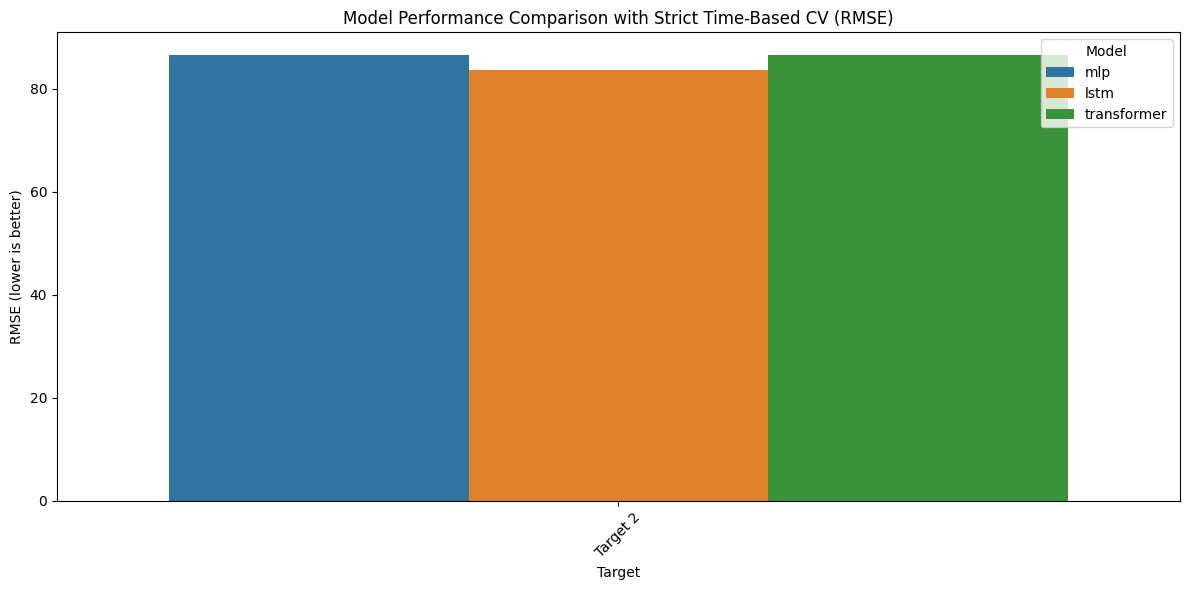

In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Create directories for saving models and results
os.makedirs('models', exist_ok=True)
os.makedirs('results', exist_ok=True)
os.makedirs('plots', exist_ok=True)
os.makedirs('interpretability', exist_ok=True)  # For interpretability results

# ================= MODEL INTERPRETABILITY FUNCTIONS =================
# Analyze feature importance using a permutation approach
def analyze_feature_importance_inline(model_type, target_name, X_test, y_test, feature_names, model=None):
    """
    Analyze and visualize feature importance directly without loading saved models
    """
    print(f"\nAnalyzing feature importance for {model_type} on {target_name}...")

    if model is None:
        print(f"No model provided for {model_type} on {target_name}, skipping analysis")
        return None

    # Create baseline prediction
    baseline_pred = model.predict(X_test, verbose=0).flatten()
    baseline_mse = mean_squared_error(y_test, baseline_pred)

    # Calculate feature importance via permutation
    feature_importances = []

    # For sequence data, analyze each feature
    seq_length, n_features = X_test.shape[1], X_test.shape[2]

    for feat_idx in range(n_features):
        # Copy the test data
        X_permuted = X_test.copy()

        # Permute this feature across all time steps
        for t in range(seq_length):
            X_permuted[:, t, feat_idx] = np.random.permutation(X_permuted[:, t, feat_idx])

        # Make predictions with permuted feature
        perm_pred = model.predict(X_permuted, verbose=0).flatten()
        perm_mse = mean_squared_error(y_test, perm_pred)

        # Importance is the increase in error when feature is permuted
        importance = perm_mse - baseline_mse
        feature_importances.append(importance)

    # Create DataFrame with feature importances
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    })
    importance_df = importance_df.sort_values('Importance', ascending=False)

    # Save to CSV
    importance_df.to_csv(f"interpretability/{model_type}{target_name.replace(' ', '')}_importance.csv", index=False)

    # Visualize top features
    plt.figure(figsize=(12, 6))
    top_features = importance_df.head(10)
    sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
    plt.title(f"Top 10 Important Features for {target_name} ({model_type.upper()})")
    plt.xlabel('Permutation Importance (higher = more important)')
    plt.tight_layout()
    plt.savefig(f"interpretability/{model_type}{target_name.replace(' ', '')}_importance.png")
    plt.close()

    return importance_df

# Visualize prediction distribution and confidence
def visualize_prediction_confidence_inline(model_type, target_name, X_test, y_test, model=None):
    """
    Visualize model predictions, errors, and confidence directly without loading saved models
    """
    print(f"\nVisualizing prediction confidence for {model_type} on {target_name}...")

    if model is None:
        print(f"No model provided for {model_type} on {target_name}, skipping visualization")
        return

    # Generate predictions
    y_pred = model.predict(X_test, verbose=0).flatten()

    # Calculate absolute error for each prediction
    abs_errors = np.abs(y_test - y_pred)

    # Create dataframe for visualization
    pred_df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred,
        'AbsError': abs_errors
    })

    # Create scatter plot with error as color
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(pred_df['Actual'], pred_df['Predicted'],
                         c=pred_df['AbsError'], cmap='viridis', alpha=0.7)

    # Add perfect prediction line
    min_val = min(pred_df['Actual'].min(), pred_df['Predicted'].min())
    max_val = max(pred_df['Actual'].max(), pred_df['Predicted'].max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

    plt.colorbar(scatter, label='Absolute Error')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Prediction Confidence - {model_type.upper()} for {target_name}')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"interpretability/{model_type}{target_name.replace(' ', '')}_prediction_confidence.png")
    plt.close()

    # Create error distribution plot
    plt.figure(figsize=(10, 6))
    sns.histplot(pred_df['AbsError'], kde=True)
    plt.xlabel('Absolute Error')
    plt.ylabel('Frequency')
    plt.title(f'Error Distribution - {model_type.upper()} for {target_name}')
    plt.tight_layout()
    plt.savefig(f"interpretability/{model_type}{target_name.replace(' ', '')}_error_distribution.png")
    plt.close()

# Create a function to compare importances across targets
def compare_importances(importance_data, model_type):
    """Compare feature importance across different targets"""
    # If we have data for all targets, create comparison
    if len(importance_data) >= 2:  # Need at least 2 targets to compare
        # Get top 5 features from each target
        all_top_features = []
        for target, imp_df in importance_data.items():
            all_top_features.extend(imp_df.head(5)['Feature'].tolist())

        # Create unique list
        all_top_features = list(set(all_top_features))

        # Create comparison dataframe
        comparison_df = pd.DataFrame({'Feature': all_top_features})

        # Add importance for each target
        for target, imp_df in importance_data.items():
            # Get importance values for these features
            target_df = imp_df[imp_df['Feature'].isin(all_top_features)]
            # Create a mapping from feature to importance
            importance_map = dict(zip(target_df['Feature'], target_df['Importance']))

            # Add to comparison df with the target name as column
            comparison_df[target] = comparison_df['Feature'].map(importance_map).fillna(0)

        # Save to CSV
        comparison_df.to_csv(f"interpretability/{model_type}_feature_importance_comparison.csv", index=False)

        # Create heatmap visualization
        plt.figure(figsize=(12, 8))
        heatmap_df = comparison_df.set_index('Feature')
        sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.3f')
        plt.title(f'Feature Importance Comparison Across Targets - {model_type.upper()}')
        plt.tight_layout()
        plt.savefig(f"interpretability/{model_type}_feature_importance_heatmap.png")
        plt.close()

# # Load the preprocessed dataset
# data = pd.read_csv('processed_data.csv')
# print(f"Dataset loaded with shape: {data.shape}")

data = df2

# # Define feature and target columns
feature_columns = [f'Feature{i}' for i in range(1, 29)]
target_columns = ['Target 2']

# Sort data by Year and Company
data = data.sort_values(['Company', 'Year'])

# Prepare sequences for time-series modeling
def prepare_sequences(df, feature_cols, target_cols, seq_length=3):
    """Prepare time series sequences for each company"""
    companies = df['Company'].unique()
    X_sequences = []
    y_dict = {target: [] for target in target_cols}
    companies_included = []
    years_included = []

    for company in companies:
        company_data = df[df['Company'] == company]
        if len(company_data) >= seq_length + 1:  # +1 because we need at least one target
            company_X = company_data[feature_cols].values
            company_years = company_data['Year'].values

            for i in range(len(company_data) - seq_length):
                X_sequences.append(company_X[i:i+seq_length])
                companies_included.append(company)
                years_included.append(company_years[i+seq_length-1])

                for target in target_cols:
                    y_dict[target].append(company_data[target].values[i+seq_length])

    # Convert to numpy arrays
    X_sequences = np.array(X_sequences)
    for target in target_cols:
        y_dict[target] = np.array(y_dict[target])

    # Create tracking DataFrame for analysis
    tracking_df = pd.DataFrame({
        'Company': companies_included,
        'Year': years_included
    })

    return X_sequences, y_dict, tracking_df

# Create sequences
X_sequences, y_dict, tracking_df = prepare_sequences(data, feature_columns, target_columns, seq_length=3)
print(f"Created {len(X_sequences)} sequences with shape {X_sequences.shape}")

# Print year distribution
year_distribution = tracking_df['Year'].value_counts().sort_index()
print(f"Year distribution in sequences:")
print(year_distribution)

# Implement strict non-overlapping time-based CV
def strict_time_cv_split(X, y_dict, tracking_df, n_splits=5):
    """
    Create strictly non-overlapping time-based CV splits
    Ensures no year appears in both training and testing sets
    """
    years = sorted(tracking_df['Year'].unique())
    total_years = len(years)

    # Calculate approximate number of years for each split
    years_per_split = total_years // n_splits

    cv_splits = []
    for i in range(n_splits):
        # Calculate year boundaries (no overlap)
        if i < n_splits - 1:
            train_end_year = years[min((i+1) * years_per_split - 1, total_years-1)]
            test_start_year = years[min((i+1) * years_per_split, total_years-1)]
            test_end_year = years[min((i+2) * years_per_split - 1, total_years-1)]
        else:
            # Last fold uses all remaining years for testing
            train_end_year = years[min((i+1) * years_per_split - 1, total_years-1)]
            test_start_year = years[min((i+1) * years_per_split, total_years-1)]
            test_end_year = years[-1]

        # Get indices for this split
        train_indices = tracking_df[tracking_df['Year'] <= train_end_year].index
        test_indices = tracking_df[(tracking_df['Year'] >= test_start_year) &
                                   (tracking_df['Year'] <= test_end_year)].index

        # Create the train/test split
        X_train = X[train_indices]
        X_test = X[test_indices]
        y_train = {target: y_dict[target][train_indices] for target in y_dict}
        y_test = {target: y_dict[target][test_indices] for target in y_dict}

        cv_splits.append((X_train, y_train, X_test, y_test))

        # Print information about this fold
        train_years = tracking_df.iloc[train_indices]['Year'].unique()
        test_years = tracking_df.iloc[test_indices]['Year'].unique()
        print(f"Fold {i+1}: Train years: {min(train_years)}-{max(train_years)}, "
              f"Test years: {min(test_years)}-{max(test_years)}, "
              f"Train size: {len(train_indices)}, Test size: {len(test_indices)}")

    return cv_splits

# Create CV splits with strict time-based boundaries
print("\nCreating strict time-based cross-validation splits (no overlapping years)...")
cv_splits = strict_time_cv_split(X_sequences, y_dict, tracking_df, n_splits=5)

# Model building functions
def build_mlp_model(input_shape, target_name):
    """Build a Multi-Layer Perceptron model"""
    input_layer = Input(shape=input_shape)
    x = Flatten()(input_layer)

    # MLP layers
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Dense(32, activation='relu')(x)
    x = Dropout(0.2)(x)

    output = Dense(1, activation='linear')(x)

    # Use safe name without spaces
    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    return model

def build_lstm_model(input_shape, target_name):
    """Build an LSTM model"""
    input_layer = Input(shape=input_shape)

    # LSTM layers
    x = LSTM(32, return_sequences=True)(input_layer)
    x = Dropout(0.3)(x)

    x = LSTM(16)(x)
    x = Dropout(0.2)(x)

    output = Dense(1, activation='linear')(x)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    return model

def build_transformer_model(input_shape, target_name):
    """Build a simple Transformer model"""
    input_layer = Input(shape=input_shape)

    # Self-attention
    x = input_layer

    # Transformer block
    attn = MultiHeadAttention(num_heads=4, key_dim=8)(x, x)
    x = LayerNormalization(epsilon=1e-6)(x + attn)

    # Feed-forward network
    ffn = Dense(32, activation='relu')(x)
    ffn = Dense(input_shape[-1])(ffn)
    x = LayerNormalization(epsilon=1e-6)(x + ffn)

    # Flatten for final dense layers
    x = Flatten()(x)
    x = Dropout(0.2)(x)

    output = Dense(1, activation='linear')(x)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    return model

# Train and evaluate with CV
def train_and_evaluate_cv(model_type, cv_splits, input_shape, target_name):
    """Train and evaluate a model using cross-validation for a specific target"""
    all_rmse = []
    all_models = []

    for fold_idx, (X_train, y_train_dict, X_test, y_test_dict) in enumerate(cv_splits):
        # Get target-specific data
        y_train = y_train_dict[target_name]
        y_test = y_test_dict[target_name]

        print(f"\nTraining {model_type} for {target_name} - Fold {fold_idx+1}/{len(cv_splits)}")

        # Build model based on type
        if model_type == 'mlp':
            model = build_mlp_model(input_shape, target_name)
        elif model_type == 'lstm':
            model = build_lstm_model(input_shape, target_name)
        elif model_type == 'transformer':
            model = build_transformer_model(input_shape, target_name)
        else:
            raise ValueError(f"Unknown model type: {model_type}")

        callbacks = [
            EarlyStopping(patience=5, restore_best_weights=True),
            ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)
        ]

        # Train model
        history = model.fit(
            X_train, y_train,
            validation_split=0.2,
            epochs=10,  # Limited epochs for demo
            batch_size=32,
            callbacks=callbacks,
            verbose=1
        )

        # Evaluate on test data
        y_pred = model.predict(X_test).flatten()
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        all_rmse.append(rmse)
        all_models.append(model)

        print(f"{model_type.upper()} - {target_name} - Fold {fold_idx+1} Test RMSE: {rmse:.4f}")

        # Plot loss curves for this fold
        plt.figure(figsize=(10, 6))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_type.upper()} Loss for {target_name} - Fold {fold_idx+1}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss (MSE)')
        plt.legend()
        plt.savefig(f"plots/{model_type}{target_name.replace(' ', '')}_fold{fold_idx+1}_loss.png")
        plt.close()

        # Save predictions for this fold
        results_df = pd.DataFrame({
            'Actual': y_test,
            'Predicted': y_pred,
            'Error': y_test - y_pred
        })
        results_df.to_csv(f"results/{model_type}{target_name.replace(' ', '')}_fold{fold_idx+1}_predictions.csv", index=False)

        # For the last fold, perform model interpretability
        if fold_idx == len(cv_splits) - 1:
            # Analyze feature importance
            analyze_feature_importance_inline(
                model_type=model_type,
                target_name=target_name,
                X_test=X_test,
                y_test=y_test,
                feature_names=feature_columns,
                model=model
            )

            # Visualize prediction confidence
            visualize_prediction_confidence_inline(
                model_type=model_type,
                target_name=target_name,
                X_test=X_test,
                y_test=y_test,
                model=model
            )

    # Calculate average RMSE across folds
    avg_rmse = np.mean(all_rmse)
    print(f"{model_type.upper()} - {target_name} - Average CV RMSE: {avg_rmse:.4f}")

    # Save the best model (with lowest RMSE)
    best_model_idx = np.argmin(all_rmse)
    best_model = all_models[best_model_idx]
    best_model.save(f"models/{model_type}{target_name.replace(' ', '')}_best.h5")

    return best_model, avg_rmse

# Model comparison
results = []

# Train models for each target with cross-validation
input_shape = (3, len(feature_columns))  # (sequence_length, num_features)

# Store importance data for comparison across targets
importance_data = {model_type: {} for model_type in ['mlp', 'lstm', 'transformer']}

for target in target_columns:
    print(f"\n{'='*50}")
    print(f"Training models for {target}")
    print(f"{'='*50}")

    for model_type in ['mlp', 'lstm', 'transformer']:
        model, rmse = train_and_evaluate_cv(
            model_type,
            cv_splits,
            input_shape,
            target
        )

        results.append({
            'Model': model_type,
            'Target': target,
            'RMSE': rmse
        })

        # Load feature importance if available
        importance_file = f"interpretability/{model_type}{target.replace(' ', '')}_importance.csv"
        if os.path.exists(importance_file):
            imp_df = pd.read_csv(importance_file)
            importance_data[model_type][target] = imp_df

# Create comparison visualization with CV results
results_df = pd.DataFrame(results)
results_df.to_csv("results/demo_model_strict_cv_comparison.csv", index=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Target', y='RMSE', hue='Model')
plt.title("Model Performance Comparison with Strict Time-Based CV (RMSE)")
plt.ylabel("RMSE (lower is better)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plots/demo_model_strict_cv_comparison.png")

# Compare feature importance across targets for each model type
print("\nComparing feature importance across targets...")
for model_type in ['mlp', 'lstm', 'transformer']:
    if importance_data[model_type]:
        compare_importances(importance_data[model_type], model_type)

print("\nModel interpretability analysis completed. Results saved to the 'interpretability' directory.")

## Target 3

Created 13908 sequences with shape (13908, 3, 28)
Year distribution in sequences:
Year
2001    444
2002    468
2003    492
2004    512
2005    539
2006    545
2007    575
2008    624
2009    674
2010    735
2011    746
2012    774
2013    813
2014    817
2015    824
2016    831
2017    865
2018    865
2019    882
2020    883
Name: count, dtype: int64

Creating strict time-based cross-validation splits (no overlapping years)...
Fold 1: Train years: 2001-2004, Test years: 2005-2008, Train size: 1916, Test size: 2283
Fold 2: Train years: 2001-2008, Test years: 2009-2012, Train size: 4199, Test size: 2929
Fold 3: Train years: 2001-2012, Test years: 2013-2016, Train size: 7128, Test size: 3285
Fold 4: Train years: 2001-2016, Test years: 2017-2020, Train size: 10413, Test size: 3495
Fold 5: Train years: 2001-2020, Test years: 2020-2020, Train size: 13908, Test size: 883

Training models for Target 3

Training mlp for Target 3 - Fold 1/5
Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - lo

MLP - Target 3 - Average CV RMSE: 117.3654

Training lstm for Target 3 - Fold 1/5
Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 33057.1523 - mae: 151.3607 - val_loss: 32293.0449 - val_mae: 147.6634 - learning_rate: 0.0010
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 32800.2266 - mae: 151.1311 - val_loss: 31911.1699 - val_mae: 147.4057 - learning_rate: 0.0010
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 32448.0625 - mae: 150.8366 - val_loss: 31713.7402 - val_mae: 147.2874 - learning_rate: 0.0010
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 32265.7285 - mae: 150.6079 - val_loss: 31573.7051 - val_mae: 147.1750 - learning_rate: 0.0010
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 32160.1328 - mae: 150.5771 - val_loss: 31455.9688 - val_mae: 147.0943 - learning_rate: 0.0010
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 32010.8613 - mae: 150.3178 - val_loss: 31353.2559 - val_mae: 147.0148 - learning_rate: 0.0010
Epoch

LSTM - Target 3 - Average CV RMSE: 116.2464

Training transformer for Target 3 - Fold 1/5
Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 145ms/step - loss: 32937.7461 - mae: 151.1749 - val_loss: 31755.9785 - val_mae: 147.2496 - learning_rate: 0.0010
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 32210.2695 - mae: 150.5041 - val_loss: 31256.4844 - val_mae: 146.9261 - learning_rate: 0.0010
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31698.8574 - mae: 150.0027 - val_loss: 30663.8965 - val_mae: 146.4491 - learning_rate: 0.0010
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31138.8086 - mae: 149.3831 - val_loss: 30030.9688 - val_mae: 145.8785 - learning_rate: 0.0010
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30490.7090 - mae: 148.5600 - val_loss: 29368.5020 - val_mae: 145.1464 - learning_rate: 0.0010
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29908.1309 - mae: 147.8577 - val_loss: 28821.4531 - val_mae: 144.9357 - learning_rate: 0

TRANSFORMER - Target 3 - Average CV RMSE: 116.3769

Comparing feature importance across targets...

Model interpretability analysis completed. Results saved to the 'interpretability' directory.


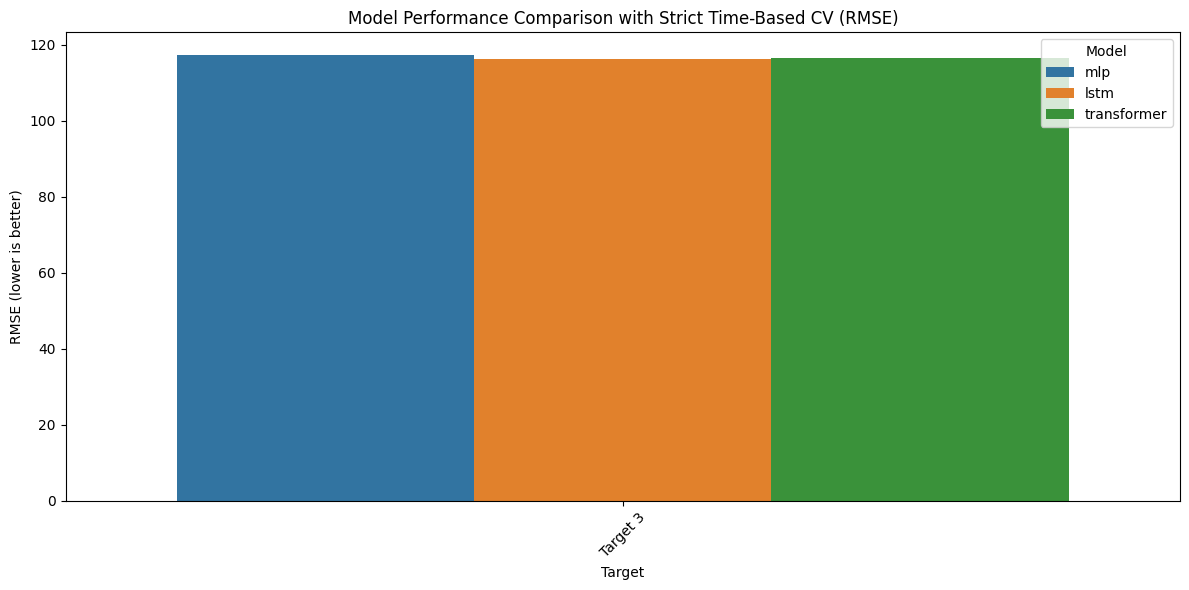

In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Create directories for saving models and results
os.makedirs('models', exist_ok=True)
os.makedirs('results', exist_ok=True)
os.makedirs('plots', exist_ok=True)
os.makedirs('interpretability', exist_ok=True)  # For interpretability results

# ================= MODEL INTERPRETABILITY FUNCTIONS =================
# Analyze feature importance using a permutation approach
def analyze_feature_importance_inline(model_type, target_name, X_test, y_test, feature_names, model=None):
    """
    Analyze and visualize feature importance directly without loading saved models
    """
    print(f"\nAnalyzing feature importance for {model_type} on {target_name}...")

    if model is None:
        print(f"No model provided for {model_type} on {target_name}, skipping analysis")
        return None

    # Create baseline prediction
    baseline_pred = model.predict(X_test, verbose=0).flatten()
    baseline_mse = mean_squared_error(y_test, baseline_pred)

    # Calculate feature importance via permutation
    feature_importances = []

    # For sequence data, analyze each feature
    seq_length, n_features = X_test.shape[1], X_test.shape[2]

    for feat_idx in range(n_features):
        # Copy the test data
        X_permuted = X_test.copy()

        # Permute this feature across all time steps
        for t in range(seq_length):
            X_permuted[:, t, feat_idx] = np.random.permutation(X_permuted[:, t, feat_idx])

        # Make predictions with permuted feature
        perm_pred = model.predict(X_permuted, verbose=0).flatten()
        perm_mse = mean_squared_error(y_test, perm_pred)

        # Importance is the increase in error when feature is permuted
        importance = perm_mse - baseline_mse
        feature_importances.append(importance)

    # Create DataFrame with feature importances
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    })
    importance_df = importance_df.sort_values('Importance', ascending=False)

    # Save to CSV
    importance_df.to_csv(f"interpretability/{model_type}{target_name.replace(' ', '')}_importance.csv", index=False)

    # Visualize top features
    plt.figure(figsize=(12, 6))
    top_features = importance_df.head(10)
    sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
    plt.title(f"Top 10 Important Features for {target_name} ({model_type.upper()})")
    plt.xlabel('Permutation Importance (higher = more important)')
    plt.tight_layout()
    plt.savefig(f"interpretability/{model_type}{target_name.replace(' ', '')}_importance.png")
    plt.close()

    return importance_df

# Visualize prediction distribution and confidence
def visualize_prediction_confidence_inline(model_type, target_name, X_test, y_test, model=None):
    """
    Visualize model predictions, errors, and confidence directly without loading saved models
    """
    print(f"\nVisualizing prediction confidence for {model_type} on {target_name}...")

    if model is None:
        print(f"No model provided for {model_type} on {target_name}, skipping visualization")
        return

    # Generate predictions
    y_pred = model.predict(X_test, verbose=0).flatten()

    # Calculate absolute error for each prediction
    abs_errors = np.abs(y_test - y_pred)

    # Create dataframe for visualization
    pred_df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred,
        'AbsError': abs_errors
    })

    # Create scatter plot with error as color
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(pred_df['Actual'], pred_df['Predicted'],
                         c=pred_df['AbsError'], cmap='viridis', alpha=0.7)

    # Add perfect prediction line
    min_val = min(pred_df['Actual'].min(), pred_df['Predicted'].min())
    max_val = max(pred_df['Actual'].max(), pred_df['Predicted'].max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

    plt.colorbar(scatter, label='Absolute Error')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Prediction Confidence - {model_type.upper()} for {target_name}')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"interpretability/{model_type}{target_name.replace(' ', '')}_prediction_confidence.png")
    plt.close()

    # Create error distribution plot
    plt.figure(figsize=(10, 6))
    sns.histplot(pred_df['AbsError'], kde=True)
    plt.xlabel('Absolute Error')
    plt.ylabel('Frequency')
    plt.title(f'Error Distribution - {model_type.upper()} for {target_name}')
    plt.tight_layout()
    plt.savefig(f"interpretability/{model_type}{target_name.replace(' ', '')}_error_distribution.png")
    plt.close()

# Create a function to compare importances across targets
def compare_importances(importance_data, model_type):
    """Compare feature importance across different targets"""
    # If we have data for all targets, create comparison
    if len(importance_data) >= 2:  # Need at least 2 targets to compare
        # Get top 5 features from each target
        all_top_features = []
        for target, imp_df in importance_data.items():
            all_top_features.extend(imp_df.head(5)['Feature'].tolist())

        # Create unique list
        all_top_features = list(set(all_top_features))

        # Create comparison dataframe
        comparison_df = pd.DataFrame({'Feature': all_top_features})

        # Add importance for each target
        for target, imp_df in importance_data.items():
            # Get importance values for these features
            target_df = imp_df[imp_df['Feature'].isin(all_top_features)]
            # Create a mapping from feature to importance
            importance_map = dict(zip(target_df['Feature'], target_df['Importance']))

            # Add to comparison df with the target name as column
            comparison_df[target] = comparison_df['Feature'].map(importance_map).fillna(0)

        # Save to CSV
        comparison_df.to_csv(f"interpretability/{model_type}_feature_importance_comparison.csv", index=False)

        # Create heatmap visualization
        plt.figure(figsize=(12, 8))
        heatmap_df = comparison_df.set_index('Feature')
        sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.3f')
        plt.title(f'Feature Importance Comparison Across Targets - {model_type.upper()}')
        plt.tight_layout()
        plt.savefig(f"interpretability/{model_type}_feature_importance_heatmap.png")
        plt.close()

# # Load the preprocessed dataset
# data = pd.read_csv('processed_data.csv')
# print(f"Dataset loaded with shape: {data.shape}")

data = df3

# # Define feature and target columns
feature_columns = [f'Feature{i}' for i in range(1, 29)]
target_columns = ['Target 3']

# Sort data by Year and Company
data = data.sort_values(['Company', 'Year'])

# Prepare sequences for time-series modeling
def prepare_sequences(df, feature_cols, target_cols, seq_length=3):
    """Prepare time series sequences for each company"""
    companies = df['Company'].unique()
    X_sequences = []
    y_dict = {target: [] for target in target_cols}
    companies_included = []
    years_included = []

    for company in companies:
        company_data = df[df['Company'] == company]
        if len(company_data) >= seq_length + 1:  # +1 because we need at least one target
            company_X = company_data[feature_cols].values
            company_years = company_data['Year'].values

            for i in range(len(company_data) - seq_length):
                X_sequences.append(company_X[i:i+seq_length])
                companies_included.append(company)
                years_included.append(company_years[i+seq_length-1])

                for target in target_cols:
                    y_dict[target].append(company_data[target].values[i+seq_length])

    # Convert to numpy arrays
    X_sequences = np.array(X_sequences)
    for target in target_cols:
        y_dict[target] = np.array(y_dict[target])

    # Create tracking DataFrame for analysis
    tracking_df = pd.DataFrame({
        'Company': companies_included,
        'Year': years_included
    })

    return X_sequences, y_dict, tracking_df

# Create sequences
X_sequences, y_dict, tracking_df = prepare_sequences(data, feature_columns, target_columns, seq_length=3)
print(f"Created {len(X_sequences)} sequences with shape {X_sequences.shape}")

# Print year distribution
year_distribution = tracking_df['Year'].value_counts().sort_index()
print(f"Year distribution in sequences:")
print(year_distribution)

# Implement strict non-overlapping time-based CV
def strict_time_cv_split(X, y_dict, tracking_df, n_splits=5):
    """
    Create strictly non-overlapping time-based CV splits
    Ensures no year appears in both training and testing sets
    """
    years = sorted(tracking_df['Year'].unique())
    total_years = len(years)

    # Calculate approximate number of years for each split
    years_per_split = total_years // n_splits

    cv_splits = []
    for i in range(n_splits):
        # Calculate year boundaries (no overlap)
        if i < n_splits - 1:
            train_end_year = years[min((i+1) * years_per_split - 1, total_years-1)]
            test_start_year = years[min((i+1) * years_per_split, total_years-1)]
            test_end_year = years[min((i+2) * years_per_split - 1, total_years-1)]
        else:
            # Last fold uses all remaining years for testing
            train_end_year = years[min((i+1) * years_per_split - 1, total_years-1)]
            test_start_year = years[min((i+1) * years_per_split, total_years-1)]
            test_end_year = years[-1]

        # Get indices for this split
        train_indices = tracking_df[tracking_df['Year'] <= train_end_year].index
        test_indices = tracking_df[(tracking_df['Year'] >= test_start_year) &
                                   (tracking_df['Year'] <= test_end_year)].index

        # Create the train/test split
        X_train = X[train_indices]
        X_test = X[test_indices]
        y_train = {target: y_dict[target][train_indices] for target in y_dict}
        y_test = {target: y_dict[target][test_indices] for target in y_dict}

        cv_splits.append((X_train, y_train, X_test, y_test))

        # Print information about this fold
        train_years = tracking_df.iloc[train_indices]['Year'].unique()
        test_years = tracking_df.iloc[test_indices]['Year'].unique()
        print(f"Fold {i+1}: Train years: {min(train_years)}-{max(train_years)}, "
              f"Test years: {min(test_years)}-{max(test_years)}, "
              f"Train size: {len(train_indices)}, Test size: {len(test_indices)}")

    return cv_splits

# Create CV splits with strict time-based boundaries
print("\nCreating strict time-based cross-validation splits (no overlapping years)...")
cv_splits = strict_time_cv_split(X_sequences, y_dict, tracking_df, n_splits=5)

# Model building functions
def build_mlp_model(input_shape, target_name):
    """Build a Multi-Layer Perceptron model"""
    input_layer = Input(shape=input_shape)
    x = Flatten()(input_layer)

    # MLP layers
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Dense(32, activation='relu')(x)
    x = Dropout(0.2)(x)

    output = Dense(1, activation='linear')(x)

    # Use safe name without spaces
    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    return model

def build_lstm_model(input_shape, target_name):
    """Build an LSTM model"""
    input_layer = Input(shape=input_shape)

    # LSTM layers
    x = LSTM(32, return_sequences=True)(input_layer)
    x = Dropout(0.3)(x)

    x = LSTM(16)(x)
    x = Dropout(0.2)(x)

    output = Dense(1, activation='linear')(x)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    return model

def build_transformer_model(input_shape, target_name):
    """Build a simple Transformer model"""
    input_layer = Input(shape=input_shape)

    # Self-attention
    x = input_layer

    # Transformer block
    attn = MultiHeadAttention(num_heads=4, key_dim=8)(x, x)
    x = LayerNormalization(epsilon=1e-6)(x + attn)

    # Feed-forward network
    ffn = Dense(32, activation='relu')(x)
    ffn = Dense(input_shape[-1])(ffn)
    x = LayerNormalization(epsilon=1e-6)(x + ffn)

    # Flatten for final dense layers
    x = Flatten()(x)
    x = Dropout(0.2)(x)

    output = Dense(1, activation='linear')(x)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    return model

# Train and evaluate with CV
def train_and_evaluate_cv(model_type, cv_splits, input_shape, target_name):
    """Train and evaluate a model using cross-validation for a specific target"""
    all_rmse = []
    all_models = []

    for fold_idx, (X_train, y_train_dict, X_test, y_test_dict) in enumerate(cv_splits):
        # Get target-specific data
        y_train = y_train_dict[target_name]
        y_test = y_test_dict[target_name]

        print(f"\nTraining {model_type} for {target_name} - Fold {fold_idx+1}/{len(cv_splits)}")

        # Build model based on type
        if model_type == 'mlp':
            model = build_mlp_model(input_shape, target_name)
        elif model_type == 'lstm':
            model = build_lstm_model(input_shape, target_name)
        elif model_type == 'transformer':
            model = build_transformer_model(input_shape, target_name)
        else:
            raise ValueError(f"Unknown model type: {model_type}")

        callbacks = [
            EarlyStopping(patience=5, restore_best_weights=True),
            ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)
        ]

        # Train model
        history = model.fit(
            X_train, y_train,
            validation_split=0.2,
            epochs=10,  # Limited epochs for demo
            batch_size=32,
            callbacks=callbacks,
            verbose=1
        )

        # Evaluate on test data
        y_pred = model.predict(X_test).flatten()
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        all_rmse.append(rmse)
        all_models.append(model)

        print(f"{model_type.upper()} - {target_name} - Fold {fold_idx+1} Test RMSE: {rmse:.4f}")

        # Plot loss curves for this fold
        plt.figure(figsize=(10, 6))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_type.upper()} Loss for {target_name} - Fold {fold_idx+1}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss (MSE)')
        plt.legend()
        plt.savefig(f"plots/{model_type}{target_name.replace(' ', '')}_fold{fold_idx+1}_loss.png")
        plt.close()

        # Save predictions for this fold
        results_df = pd.DataFrame({
            'Actual': y_test,
            'Predicted': y_pred,
            'Error': y_test - y_pred
        })
        results_df.to_csv(f"results/{model_type}{target_name.replace(' ', '')}_fold{fold_idx+1}_predictions.csv", index=False)

        # For the last fold, perform model interpretability
        if fold_idx == len(cv_splits) - 1:
            # Analyze feature importance
            analyze_feature_importance_inline(
                model_type=model_type,
                target_name=target_name,
                X_test=X_test,
                y_test=y_test,
                feature_names=feature_columns,
                model=model
            )

            # Visualize prediction confidence
            visualize_prediction_confidence_inline(
                model_type=model_type,
                target_name=target_name,
                X_test=X_test,
                y_test=y_test,
                model=model
            )

    # Calculate average RMSE across folds
    avg_rmse = np.mean(all_rmse)
    print(f"{model_type.upper()} - {target_name} - Average CV RMSE: {avg_rmse:.4f}")

    # Save the best model (with lowest RMSE)
    best_model_idx = np.argmin(all_rmse)
    best_model = all_models[best_model_idx]
    best_model.save(f"models/{model_type}{target_name.replace(' ', '')}_best.h5")

    return best_model, avg_rmse

# Model comparison
results = []

# Train models for each target with cross-validation
input_shape = (3, len(feature_columns))  # (sequence_length, num_features)

# Store importance data for comparison across targets
importance_data = {model_type: {} for model_type in ['mlp', 'lstm', 'transformer']}

for target in target_columns:
    print(f"\n{'='*50}")
    print(f"Training models for {target}")
    print(f"{'='*50}")

    for model_type in ['mlp', 'lstm', 'transformer']:
        model, rmse = train_and_evaluate_cv(
            model_type,
            cv_splits,
            input_shape,
            target
        )

        results.append({
            'Model': model_type,
            'Target': target,
            'RMSE': rmse
        })

        # Load feature importance if available
        importance_file = f"interpretability/{model_type}{target.replace(' ', '')}_importance.csv"
        if os.path.exists(importance_file):
            imp_df = pd.read_csv(importance_file)
            importance_data[model_type][target] = imp_df

# Create comparison visualization with CV results
results_df = pd.DataFrame(results)
results_df.to_csv("results/demo_model_strict_cv_comparison.csv", index=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Target', y='RMSE', hue='Model')
plt.title("Model Performance Comparison with Strict Time-Based CV (RMSE)")
plt.ylabel("RMSE (lower is better)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plots/demo_model_strict_cv_comparison.png")

# Compare feature importance across targets for each model type
print("\nComparing feature importance across targets...")
for model_type in ['mlp', 'lstm', 'transformer']:
    if importance_data[model_type]:
        compare_importances(importance_data[model_type], model_type)

print("\nModel interpretability analysis completed. Results saved to the 'interpretability' directory.")

## using GPU

In [ ]:
import tensorflow as tf

# Check for available GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"Found {len(gpus)} GPU(s): {gpus}")
    try:
        # Configure memory growth to avoid allocating all memory at once
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(f"{len(gpus)} Physical GPUs, {len(logical_gpus)} Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
else:
    print("No GPU found. Running on CPU.")

# Verify TensorFlow is using GPU
print(f"TensorFlow version: {tf.__version__}")
print(f"Is GPU available: {tf.test.is_gpu_available()}")
print("Devices available:")
print(tf.config.list_physical_devices())


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Found 1 GPU(s): [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Physical devices cannot be modified after being initialized
TensorFlow version: 2.18.0
Is GPU available: True
Devices available:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# GPU memory optimization
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only allocate what's needed on the GPU
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Physical devices cannot be modified after being initialized


Created 13908 sequences with shape (13908, 3, 28)
Year distribution in sequences:
Year
2001    444
2002    468
2003    492
2004    512
2005    539
2006    545
2007    575
2008    624
2009    674
2010    735
2011    746
2012    774
2013    813
2014    817
2015    824
2016    831
2017    865
2018    865
2019    882
2020    883
Name: count, dtype: int64

Creating strict time-based cross-validation splits (no overlapping years)...
Fold 1: Train years: 2001-2004, Test years: 2005-2008, Train size: 1916, Test size: 2283
Fold 2: Train years: 2001-2008, Test years: 2009-2012, Train size: 4199, Test size: 2929
Fold 3: Train years: 2001-2012, Test years: 2013-2016, Train size: 7128, Test size: 3285
Fold 4: Train years: 2001-2016, Test years: 2017-2020, Train size: 10413, Test size: 3495
Fold 5: Train years: 2001-2020, Test years: 2020-2020, Train size: 13908, Test size: 883

Training models for Target 3
Using mixed precision for GPU training

Training mlp for Target 3 - Fold 1/5
Epoch 1/10
24/24

MLP - Target 3 - Average CV RMSE: 116.6727
Using mixed precision for GPU training

Training lstm for Target 3 - Fold 1/5
Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 33289.0195 - mae: 151.8445 - val_loss: 32427.5723 - val_mae: 147.7455 - learning_rate: 0.0010
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 33233.5938 - mae: 151.7861 - val_loss: 32316.6270 - val_mae: 147.6473 - learning_rate: 0.0010
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 33079.2734 - mae: 151.6309 - val_loss: 32027.1172 - val_mae: 147.4387 - learning_rate: 0.0010
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 32785.6797 - mae: 151.3815 - val_loss: 31843.8770 - val_mae: 147.3360 - learning_rate: 0.0010
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 32618.4414 - mae: 151.2221 - val_loss: 31747.8047 - val_mae: 147.2746 - learning_rate: 0.0010
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 32520.4707 - mae: 151.1019 - val_loss: 31666.5215 - val

LSTM - Target 3 - Average CV RMSE: 117.0801
Using mixed precision for GPU training

Training transformer for Target 3 - Fold 1/5
Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 247ms/step - loss: 33172.5117 - mae: 151.7072 - val_loss: 32013.3379 - val_mae: 147.3533 - learning_rate: 0.0010
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32743.8047 - mae: 151.3202 - val_loss: 31646.5703 - val_mae: 147.1458 - learning_rate: 0.0010
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32341.2754 - mae: 150.9146 - val_loss: 31339.3203 - val_mae: 146.9513 - learning_rate: 0.0010
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32024.9512 - mae: 150.5871 - val_loss: 31020.8125 - val_mae: 146.6999 - learning_rate: 0.0010
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31722.0000 - mae: 150.2746 - val_loss: 30699.2246 - val_mae: 146.4460 - learning_rate: 0.0010
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31417.0566 - mae: 149.9189 - val_loss: 30362.3125 

TRANSFORMER - Target 3 - Average CV RMSE: 115.6454

Comparing feature importance across targets...

Model interpretability analysis completed. Results saved to the 'interpretability' directory.


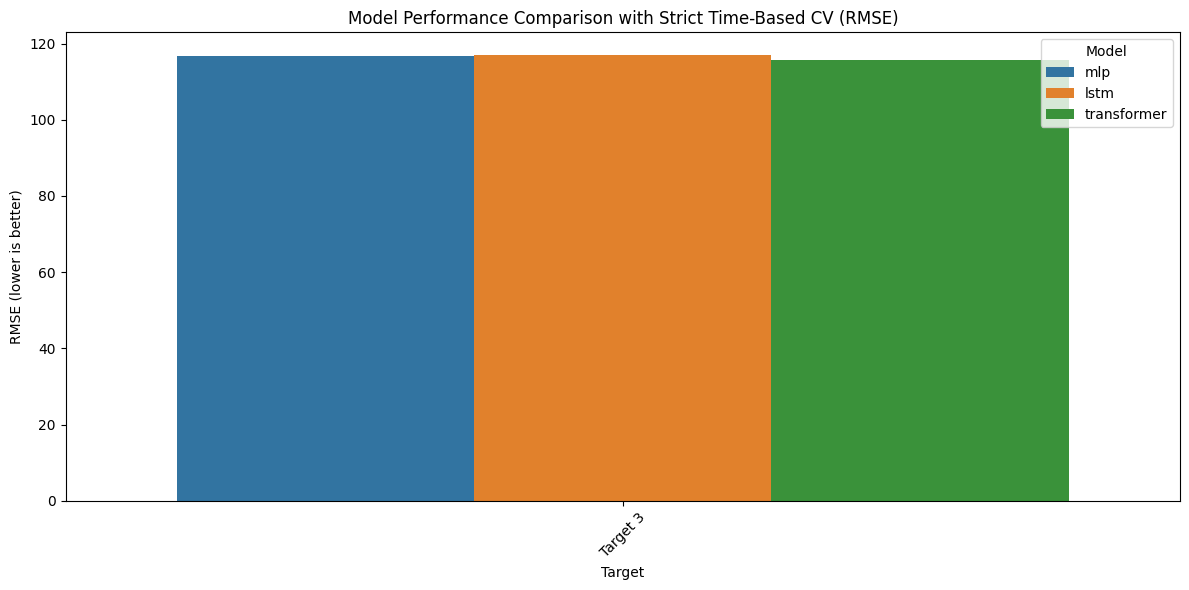

In [ ]:
# Create directories for saving models and results
os.makedirs('models', exist_ok=True)
os.makedirs('results', exist_ok=True)
os.makedirs('plots', exist_ok=True)
os.makedirs('interpretability', exist_ok=True)  # For interpretability results

# ================= MODEL INTERPRETABILITY FUNCTIONS =================
# Analyze feature importance using a permutation approach
def analyze_feature_importance_inline(model_type, target_name, X_test, y_test, feature_names, model=None):
    """
    Analyze and visualize feature importance directly without loading saved models
    """
    print(f"\nAnalyzing feature importance for {model_type} on {target_name}...")

    if model is None:
        print(f"No model provided for {model_type} on {target_name}, skipping analysis")
        return None

    # Create baseline prediction
    baseline_pred = model.predict(X_test, verbose=0).flatten()
    baseline_mse = mean_squared_error(y_test, baseline_pred)

    # Calculate feature importance via permutation
    feature_importances = []

    # For sequence data, analyze each feature
    seq_length, n_features = X_test.shape[1], X_test.shape[2]

    for feat_idx in range(n_features):
        # Copy the test data
        X_permuted = X_test.copy()

        # Permute this feature across all time steps
        for t in range(seq_length):
            X_permuted[:, t, feat_idx] = np.random.permutation(X_permuted[:, t, feat_idx])

        # Make predictions with permuted feature
        perm_pred = model.predict(X_permuted, verbose=0).flatten()
        perm_mse = mean_squared_error(y_test, perm_pred)

        # Importance is the increase in error when feature is permuted
        importance = perm_mse - baseline_mse
        feature_importances.append(importance)

    # Create DataFrame with feature importances
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    })
    importance_df = importance_df.sort_values('Importance', ascending=False)

    # Save to CSV
    importance_df.to_csv(f"interpretability/{model_type}{target_name.replace(' ', '')}_importance.csv", index=False)

    # Visualize top features
    plt.figure(figsize=(12, 6))
    top_features = importance_df.head(10)
    sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
    plt.title(f"Top 10 Important Features for {target_name} ({model_type.upper()})")
    plt.xlabel('Permutation Importance (higher = more important)')
    plt.tight_layout()
    plt.savefig(f"interpretability/{model_type}{target_name.replace(' ', '')}_importance.png")
    plt.close()

    return importance_df

# Visualize prediction distribution and confidence
def visualize_prediction_confidence_inline(model_type, target_name, X_test, y_test, model=None):
    """
    Visualize model predictions, errors, and confidence directly without loading saved models
    """
    print(f"\nVisualizing prediction confidence for {model_type} on {target_name}...")

    if model is None:
        print(f"No model provided for {model_type} on {target_name}, skipping visualization")
        return

    # Generate predictions
    y_pred = model.predict(X_test, verbose=0).flatten()

    # Calculate absolute error for each prediction
    abs_errors = np.abs(y_test - y_pred)

    # Create dataframe for visualization
    pred_df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred,
        'AbsError': abs_errors
    })

    # Create scatter plot with error as color
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(pred_df['Actual'], pred_df['Predicted'],
                         c=pred_df['AbsError'], cmap='viridis', alpha=0.7)

    # Add perfect prediction line
    min_val = min(pred_df['Actual'].min(), pred_df['Predicted'].min())
    max_val = max(pred_df['Actual'].max(), pred_df['Predicted'].max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

    plt.colorbar(scatter, label='Absolute Error')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Prediction Confidence - {model_type.upper()} for {target_name}')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"interpretability/{model_type}{target_name.replace(' ', '')}_prediction_confidence.png")
    plt.close()

    # Create error distribution plot
    plt.figure(figsize=(10, 6))
    sns.histplot(pred_df['AbsError'], kde=True)
    plt.xlabel('Absolute Error')
    plt.ylabel('Frequency')
    plt.title(f'Error Distribution - {model_type.upper()} for {target_name}')
    plt.tight_layout()
    plt.savefig(f"interpretability/{model_type}{target_name.replace(' ', '')}_error_distribution.png")
    plt.close()

# Create a function to compare importances across targets
def compare_importances(importance_data, model_type):
    """Compare feature importance across different targets"""
    # If we have data for all targets, create comparison
    if len(importance_data) >= 2:  # Need at least 2 targets to compare
        # Get top 5 features from each target
        all_top_features = []
        for target, imp_df in importance_data.items():
            all_top_features.extend(imp_df.head(5)['Feature'].tolist())

        # Create unique list
        all_top_features = list(set(all_top_features))

        # Create comparison dataframe
        comparison_df = pd.DataFrame({'Feature': all_top_features})

        # Add importance for each target
        for target, imp_df in importance_data.items():
            # Get importance values for these features
            target_df = imp_df[imp_df['Feature'].isin(all_top_features)]
            # Create a mapping from feature to importance
            importance_map = dict(zip(target_df['Feature'], target_df['Importance']))

            # Add to comparison df with the target name as column
            comparison_df[target] = comparison_df['Feature'].map(importance_map).fillna(0)

        # Save to CSV
        comparison_df.to_csv(f"interpretability/{model_type}_feature_importance_comparison.csv", index=False)

        # Create heatmap visualization
        plt.figure(figsize=(12, 8))
        heatmap_df = comparison_df.set_index('Feature')
        sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.3f')
        plt.title(f'Feature Importance Comparison Across Targets - {model_type.upper()}')
        plt.tight_layout()
        plt.savefig(f"interpretability/{model_type}_feature_importance_heatmap.png")
        plt.close()

# # Load the preprocessed dataset
# data = pd.read_csv('processed_data.csv')
# print(f"Dataset loaded with shape: {data.shape}")

data = df3

# # Define feature and target columns
feature_columns = [f'Feature{i}' for i in range(1, 29)]
target_columns = ['Target 3']

# Sort data by Year and Company
data = data.sort_values(['Company', 'Year'])

# Prepare sequences for time-series modeling
def prepare_sequences(df, feature_cols, target_cols, seq_length=3):
    """Prepare time series sequences for each company"""
    companies = df['Company'].unique()
    X_sequences = []
    y_dict = {target: [] for target in target_cols}
    companies_included = []
    years_included = []

    for company in companies:
        company_data = df[df['Company'] == company]
        if len(company_data) >= seq_length + 1:  # +1 because we need at least one target
            company_X = company_data[feature_cols].values
            company_years = company_data['Year'].values

            for i in range(len(company_data) - seq_length):
                X_sequences.append(company_X[i:i+seq_length])
                companies_included.append(company)
                years_included.append(company_years[i+seq_length-1])

                for target in target_cols:
                    y_dict[target].append(company_data[target].values[i+seq_length])

    # Convert to numpy arrays
    X_sequences = np.array(X_sequences)
    for target in target_cols:
        y_dict[target] = np.array(y_dict[target])

    # Create tracking DataFrame for analysis
    tracking_df = pd.DataFrame({
        'Company': companies_included,
        'Year': years_included
    })

    return X_sequences, y_dict, tracking_df

# Create sequences
X_sequences, y_dict, tracking_df = prepare_sequences(data, feature_columns, target_columns, seq_length=3)
print(f"Created {len(X_sequences)} sequences with shape {X_sequences.shape}")

# Print year distribution
year_distribution = tracking_df['Year'].value_counts().sort_index()
print(f"Year distribution in sequences:")
print(year_distribution)

# Implement strict non-overlapping time-based CV
def strict_time_cv_split(X, y_dict, tracking_df, n_splits=5):
    """
    Create strictly non-overlapping time-based CV splits
    Ensures no year appears in both training and testing sets
    """
    years = sorted(tracking_df['Year'].unique())
    total_years = len(years)

    # Calculate approximate number of years for each split
    years_per_split = total_years // n_splits

    cv_splits = []
    for i in range(n_splits):
        # Calculate year boundaries (no overlap)
        if i < n_splits - 1:
            train_end_year = years[min((i+1) * years_per_split - 1, total_years-1)]
            test_start_year = years[min((i+1) * years_per_split, total_years-1)]
            test_end_year = years[min((i+2) * years_per_split - 1, total_years-1)]
        else:
            # Last fold uses all remaining years for testing
            train_end_year = years[min((i+1) * years_per_split - 1, total_years-1)]
            test_start_year = years[min((i+1) * years_per_split, total_years-1)]
            test_end_year = years[-1]

        # Get indices for this split
        train_indices = tracking_df[tracking_df['Year'] <= train_end_year].index
        test_indices = tracking_df[(tracking_df['Year'] >= test_start_year) &
                                   (tracking_df['Year'] <= test_end_year)].index

        # Create the train/test split
        X_train = X[train_indices]
        X_test = X[test_indices]
        y_train = {target: y_dict[target][train_indices] for target in y_dict}
        y_test = {target: y_dict[target][test_indices] for target in y_dict}

        cv_splits.append((X_train, y_train, X_test, y_test))

        # Print information about this fold
        train_years = tracking_df.iloc[train_indices]['Year'].unique()
        test_years = tracking_df.iloc[test_indices]['Year'].unique()
        print(f"Fold {i+1}: Train years: {min(train_years)}-{max(train_years)}, "
              f"Test years: {min(test_years)}-{max(test_years)}, "
              f"Train size: {len(train_indices)}, Test size: {len(test_indices)}")

    return cv_splits

# Create CV splits with strict time-based boundaries
print("\nCreating strict time-based cross-validation splits (no overlapping years)...")
cv_splits = strict_time_cv_split(X_sequences, y_dict, tracking_df, n_splits=5)

# Model building functions
def build_mlp_model(input_shape, target_name):
    """Build a Multi-Layer Perceptron model"""
    input_layer = Input(shape=input_shape)
    x = Flatten()(input_layer)

    # MLP layers
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Dense(32, activation='relu')(x)
    x = Dropout(0.2)(x)

    output = Dense(1, activation='linear')(x)

    # Use safe name without spaces
    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    return model

def build_lstm_model(input_shape, target_name):
    """Build an LSTM model optimized for GPU"""
    input_layer = Input(shape=input_shape)

    # LSTM layers with GPU optimizations
    x = LSTM(32, return_sequences=True,
             recurrent_activation='sigmoid',  # Faster on GPU than 'hard_sigmoid'
             implementation=2)(input_layer)  # Implementation 2 is more GPU-friendly
    x = Dropout(0.3)(x)

    x = LSTM(16, implementation=2)(x)
    x = Dropout(0.2)(x)

    output = Dense(1, activation='linear')(x)

    model = Model(inputs=input_layer, outputs=output)

    # Use Adam optimizer with GPU-friendly parameters
    optimizer = Adam(learning_rate=0.001, epsilon=1e-7)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model


def build_transformer_model(input_shape, target_name):
    """Build a simple Transformer model"""
    input_layer = Input(shape=input_shape)

    # Self-attention
    x = input_layer

    # Transformer block
    attn = MultiHeadAttention(num_heads=4, key_dim=8)(x, x)
    x = LayerNormalization(epsilon=1e-6)(x + attn)

    # Feed-forward network
    ffn = Dense(32, activation='relu')(x)
    ffn = Dense(input_shape[-1])(ffn)
    x = LayerNormalization(epsilon=1e-6)(x + ffn)

    # Flatten for final dense layers
    x = Flatten()(x)
    x = Dropout(0.2)(x)

    output = Dense(1, activation='linear')(x)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    return model

# Train and evaluate with CV
def train_and_evaluate_cv(model_type, cv_splits, input_shape, target_name):
    """Train and evaluate a model using cross-validation for a specific target"""
    all_rmse = []
    all_models = []

    # Use mixed precision for faster GPU training
    if gpus:
        tf.keras.mixed_precision.set_global_policy('mixed_float16')
        print("Using mixed precision for GPU training")

    for fold_idx, (X_train, y_train_dict, X_test, y_test_dict) in enumerate(cv_splits):
        # Get target-specific data
        y_train = y_train_dict[target_name]
        y_test = y_test_dict[target_name]

        print(f"\nTraining {model_type} for {target_name} - Fold {fold_idx+1}/{len(cv_splits)}")

        # Build model based on type
        if model_type == 'mlp':
            model = build_mlp_model(input_shape, target_name)
        elif model_type == 'lstm':
            model = build_lstm_model(input_shape, target_name)
        elif model_type == 'transformer':
            model = build_transformer_model(input_shape, target_name)
        else:
            raise ValueError(f"Unknown model type: {model_type}")

        callbacks = [
            EarlyStopping(patience=5, restore_best_weights=True),
            ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)
        ]

        # Train model with GPU-optimized batch size
        batch_size = 64 if gpus else 32  # Larger batch size for GPU

        history = model.fit(
            X_train, y_train,
            validation_split=0.2,
            epochs=10,  # Limited epochs for demo
            batch_size=batch_size,
            callbacks=callbacks,
            verbose=1
        )

        # Evaluate on test data
        y_pred = model.predict(X_test).flatten()
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        all_rmse.append(rmse)
        all_models.append(model)

        print(f"{model_type.upper()} - {target_name} - Fold {fold_idx+1} Test RMSE: {rmse:.4f}")

        # Plot loss curves for this fold
        plt.figure(figsize=(10, 6))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_type.upper()} Loss for {target_name} - Fold {fold_idx+1}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss (MSE)')
        plt.legend()
        plt.savefig(f"plots/{model_type}{target_name.replace(' ', '')}_fold{fold_idx+1}_loss.png")
        plt.close()

        # Save predictions for this fold
        results_df = pd.DataFrame({
            'Actual': y_test,
            'Predicted': y_pred,
            'Error': y_test - y_pred
        })
        results_df.to_csv(f"results/{model_type}{target_name.replace(' ', '')}_fold{fold_idx+1}_predictions.csv", index=False)

        # For the last fold, perform model interpretability
        if fold_idx == len(cv_splits) - 1:
            # Analyze feature importance
            analyze_feature_importance_inline(
                model_type=model_type,
                target_name=target_name,
                X_test=X_test,
                y_test=y_test,
                feature_names=feature_columns,
                model=model
            )

            # Visualize prediction confidence
            visualize_prediction_confidence_inline(
                model_type=model_type,
                target_name=target_name,
                X_test=X_test,
                y_test=y_test,
                model=model
            )

    # Calculate average RMSE across folds
    avg_rmse = np.mean(all_rmse)
    print(f"{model_type.upper()} - {target_name} - Average CV RMSE: {avg_rmse:.4f}")

    # Save the best model (with lowest RMSE)
    best_model_idx = np.argmin(all_rmse)
    best_model = all_models[best_model_idx]
    best_model.save(f"models/{model_type}{target_name.replace(' ', '')}_best.h5")

    return best_model, avg_rmse

# Model comparison
results = []

# Train models for each target with cross-validation
input_shape = (3, len(feature_columns))  # (sequence_length, num_features)

# Store importance data for comparison across targets
importance_data = {model_type: {} for model_type in ['mlp', 'lstm', 'transformer']}

for target in target_columns:
    print(f"\n{'='*50}")
    print(f"Training models for {target}")
    print(f"{'='*50}")

    for model_type in ['mlp', 'lstm', 'transformer']:
        model, rmse = train_and_evaluate_cv(
            model_type,
            cv_splits,
            input_shape,
            target
        )

        results.append({
            'Model': model_type,
            'Target': target,
            'RMSE': rmse
        })

        # Load feature importance if available
        importance_file = f"interpretability/{model_type}{target.replace(' ', '')}_importance.csv"
        if os.path.exists(importance_file):
            imp_df = pd.read_csv(importance_file)
            importance_data[model_type][target] = imp_df

# Create comparison visualization with CV results
results_df = pd.DataFrame(results)
results_df.to_csv("results/demo_model_strict_cv_comparison.csv", index=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Target', y='RMSE', hue='Model')
plt.title("Model Performance Comparison with Strict Time-Based CV (RMSE)")
plt.ylabel("RMSE (lower is better)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plots/demo_model_strict_cv_comparison.png")

# Compare feature importance across targets for each model type
print("\nComparing feature importance across targets...")
for model_type in ['mlp', 'lstm', 'transformer']:
    if importance_data[model_type]:
        compare_importances(importance_data[model_type], model_type)

print("\nModel interpretability analysis completed. Results saved to the 'interpretability' directory.")